## Задание на позицию аналитик-стажер. <br>

Необходимо построить модель прогнозирования оттока клиентов по имеющимся признакам.
По возможности пользуйтесь библиотеками pandas, numpy, sklearn, lightgbm.

Признаки и таргет собраны для пары (пользователь, дата)

Структура данных:
churn  - таргет - ушел ли пользователь в отток <br>
year    - год <br>
month - месяц <br>
26 признаков пользователя <br>

Задача: <br>
1) Разбить данные на выборки для обучения / валидации / тестирования модели <br>
2) Построить модель оттока <br>
3) Выбрать метрики для оценивания <br>
4) Проанализировать результаты <br>
5) Предложить улучшения модели <br>
 




## Импорт библиотек

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from pandas import Series

import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from math import log as log
import os
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, plot_confusion_matrix

pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings("ignore")

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn import svm

RANDOM_SEED = 42

## Признаки:
age - возраст, <br>
annualincome - годовой доход, <br>
calldroprate - частота выпадения вызовов, <br>
callfailurerate - частота неудачных вызовов, <br>
callingnum - номер вызовов, <br>
customerid - код клиента, <br>
customersuspended - клиент отстранен от работы, <br>
education - образование, <br>
gender - пол, <br>
homeowner - владелец дома, <br>
maritalstatus - семейное положение, <br>
monthlybilledamount - ежемесячная сумма начисления, <br>
noadditionallines – отсутствие дополнительных линий, <br>
numberofcomplaints - количество жалоб, <br>
numberofmonthunpaid - количество неоплаченных месяцев, <br>
numdayscontractequipmentplanexpiring - кол-во дней истекания контракта оборудования, <br>
occupation – занятость (работа), <br>
penaltytoswitch - штраф за переключение, <br>
state - штат, <br>
totalminsusedinlastmonth - общее количество злоупотреблений в прошлом месяце, <br>
unpaidbalance - задолженность, <br>
usesinternetservice - использует интернет-сервис, <br>
usesvoiceservice - используются голосовые службы, <br>
percentagecalloutsidenetwork - процент вызовов вне сети, <br>
totalcallduration - общая продолжительность вызовов, <br>
avgcallduration - средняя продолжительность вызовов, <br>
churn - ушел ли пользователь в отток, <br>
year - год, <br>
month – месяц

In [2]:
data = pd.read_csv('churn_dataset.csv')
data.shape

(20468, 29)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   20468 non-null  int64  
 1   annualincome                          20468 non-null  int64  
 2   calldroprate                          20468 non-null  float64
 3   callfailurerate                       20468 non-null  float64
 4   callingnum                            20468 non-null  int64  
 5   customerid                            20468 non-null  int64  
 6   customersuspended                     20468 non-null  object 
 7   education                             20468 non-null  object 
 8   gender                                20468 non-null  object 
 9   homeowner                             20468 non-null  object 
 10  maritalstatus                         20468 non-null  object 
 11  monthlybilledam

In [4]:
print(data.isnull().sum())

age                                     0
annualincome                            0
calldroprate                            0
callfailurerate                         0
callingnum                              0
customerid                              0
customersuspended                       0
education                               0
gender                                  0
homeowner                               0
maritalstatus                           0
monthlybilledamount                     0
noadditionallines                       0
numberofcomplaints                      0
numberofmonthunpaid                     0
numdayscontractequipmentplanexpiring    0
occupation                              0
penaltytoswitch                         0
state                                   0
totalminsusedinlastmonth                0
unpaidbalance                           0
usesinternetservice                     0
usesvoiceservice                        0
percentagecalloutsidenetwork      

In [5]:
data.columns

Index(['age', 'annualincome', 'calldroprate', 'callfailurerate', 'callingnum',
       'customerid', 'customersuspended', 'education', 'gender', 'homeowner',
       'maritalstatus', 'monthlybilledamount', 'noadditionallines',
       'numberofcomplaints', 'numberofmonthunpaid',
       'numdayscontractequipmentplanexpiring', 'occupation', 'penaltytoswitch',
       'state', 'totalminsusedinlastmonth', 'unpaidbalance',
       'usesinternetservice', 'usesvoiceservice',
       'percentagecalloutsidenetwork', 'totalcallduration', 'avgcallduration',
       'churn', 'year', 'month'],
      dtype='object')

In [6]:
data.describe()

,age,annualincome,calldroprate,callfailurerate,callingnum,customerid,monthlybilledamount,numberofcomplaints,numberofmonthunpaid,numdayscontractequipmentplanexpiring,penaltytoswitch,totalminsusedinlastmonth,unpaidbalance,percentagecalloutsidenetwork,totalcallduration,avgcallduration,churn,year,month
count,20468.000000,20468.000000,20468.000000,20468.000000,2.046800e+04,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.000000
mean,45.334327,124446.818253,0.035021,0.015239,4.220203e+09,4757.953342,59.630252,1.499169,3.489252,49.366816,248.792603,249.740522,126.656879,0.496528,3521.696306,721.521057,0.091020,2015.0,1.611687
std,19.624577,72129.392001,0.022996,0.011213,3.365196e+08,2751.070062,34.652681,1.119153,2.289740,28.874138,144.247247,144.198066,70.367800,0.288220,1959.642260,225.677596,0.287645,0.0,0.621895
min,12.000000,4.000000,0.000000,0.000000,1.022955e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.0,1.000000
25%,28.000000,61898.000000,0.010000,0.010000,4.251031e+09,2372.750000,29.000000,0.000000,1.000000,24.000000,124.000000,126.000000,66.000000,0.250000,2047.750000,582.000000,0.000000,2015.0,1.000000
50%,45.000000,123689.500000,0.040000,0.020000,4.251054e+09,4754.000000,60.000000,2.000000,3.000000,49.000000,249.000000,249.000000,122.000000,0.500000,3365.000000,721.000000,0.000000,2015.0,2.000000
75%,62.000000,187065.250000,0.060000,0.030000,4.251077e+09,7141.250000,90.000000,3.000000,5.000000,74.000000,373.000000,374.000000,191.000000,0.750000,4786.250000,862.000000,0.000000,2015.0,2.000000
max,79.000000,249987.000000,0.070000,0.030000,4.251100e+09,9525.000000,119.000000,3.000000,7.000000,99.000000,499.000000,499.000000,249.000000,0.990000,16662.000000,1439.000000,1.000000,2015.0,3.000000


In [7]:
data.nunique()

age                                       68
annualincome                            9508
calldroprate                               8
callfailurerate                            4
callingnum                              9525
customerid                              9525
customersuspended                          2
education                                  4
gender                                     2
homeowner                                  2
maritalstatus                              2
monthlybilledamount                      120
noadditionallines                          1
numberofcomplaints                         4
numberofmonthunpaid                        8
numdayscontractequipmentplanexpiring     100
occupation                                 3
penaltytoswitch                          500
state                                     50
totalminsusedinlastmonth                 500
unpaidbalance                            250
usesinternetservice                        2
usesvoices

In [8]:
for item in data.columns:
    print(item)
    print (data[item].unique())

age
[12 42 58 20 36 67 14 45 61 23 39 69 17 48 64 26 72 50 66 29 75 53 31 47
 78 56 34 13 28 59 37 15 62 77 40 18 43 21 24 70 27 73 51 76 54 32 57 35
 38 16 19 65 22 68 46 71 49 52 30 33 79 60 63 41 44 25 74 55]
annualincome
[168147  29047  27076 ...  67056  65084 120042]
calldroprate
[0.06 0.05 0.07 0.   0.01 0.02 0.03 0.04]
callfailurerate
[0.   0.01 0.02 0.03]
callingnum
[4251078442 4251043419 4251055773 ... 4251050233 4251050074 4251075688]
customerid
[   1    2    3 ... 9523 9524 9525]
customersuspended
['Yes' 'No']
education
['Bachelor or equivalent' 'Master or equivalent' 'PhD or equivalent'
 'High School or below']
gender
['Male' 'Female']
homeowner
['Yes' 'No']
maritalstatus
['Single' 'Married']
monthlybilledamount
[ 71   8  16  74  81  19  27  85  92  30  37  95 103  41  48 106 114  52
  59 117   4  62  70  15  73  18  26  84  91  29 102  40  47 105 113  51
  58 116  69   7  14  72  80 109  54  61 119  65  10  75  83  21  28  86
  94  32  39  97 104  42  50 108 115  53   6  6

Удаляем noadditionallines - ['\\N']

In [9]:
to_drop=['noadditionallines']
data=data.drop(to_drop,axis=1)

### Выясним нужны ли признаки callingnum и customerid. Посмотрим сколько раз они повторяются

In [10]:
data['customerid_count'] = data.groupby('customerid').cumcount()+1
data['callingnum_count'] = data.groupby('callingnum').cumcount()+1

In [11]:
data.iloc[:,-1]

0        1
1        2
2        1
3        2
4        1
        ..
20463    2
20464    1
20465    2
20466    1
20467    2
Name: callingnum_count, Length: 20468, dtype: int64

In [12]:
data.iloc[:,-3:]

,month,customerid_count,callingnum_count
0,1,1,1
1,2,2,2
2,1,1,1
3,2,2,2
4,1,1,1
...,...,...,...
20463,2,2,2
20464,1,1,1
20465,2,2,2
20466,1,1,1


In [13]:
p=data['month']==data['customerid_count']
p.value_counts()

True     20404
False       64
dtype: int64

### Повторение признаков callingnum и customerid идентичны кол-ву месяцев. Год только 2015. Можно удалить 

In [14]:
to_drop=['customerid_count','callingnum_count','callingnum', 'year']
data=data.drop(to_drop,axis=1)

### Вывод - классы очень несбалансированы. На это нужно обратить внимание при обучении модели, иначе есть риск переобучиться на самый популярный класс.

0    0.90898
1    0.09102
Name: churn, dtype: float64


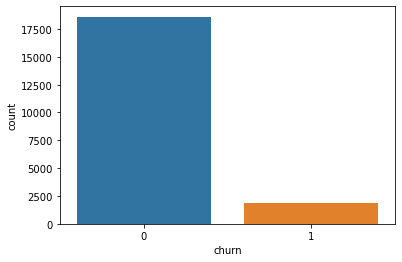

In [15]:
print(data['churn'].value_counts(normalize=True))
sns.countplot(data['churn'])

0    0.909657
1    0.090343
Name: churn, dtype: float64


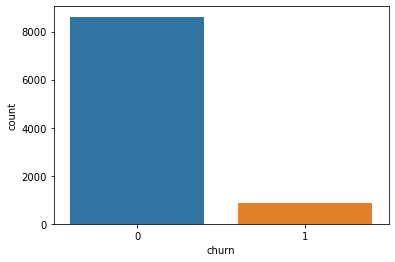

In [16]:
fir_month_data = data[data.month == 1]
print(fir_month_data['churn'].value_counts(normalize=True))
sns.countplot(fir_month_data['churn'])

0    0.909465
1    0.090535
Name: churn, dtype: float64


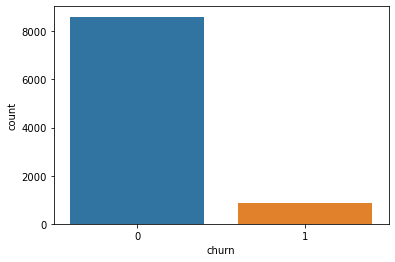

In [17]:
sec_month_data = data[data.month == 2]
print(sec_month_data['churn'].value_counts(normalize=True))
sns.countplot(sec_month_data['churn'])

### Количество оттока с каждым месяцев увеличивается незначительно

In [18]:
#sns.pairplot(data, hue='churn', height=2.5);

### Рассмотрим отношение признаков к таргету

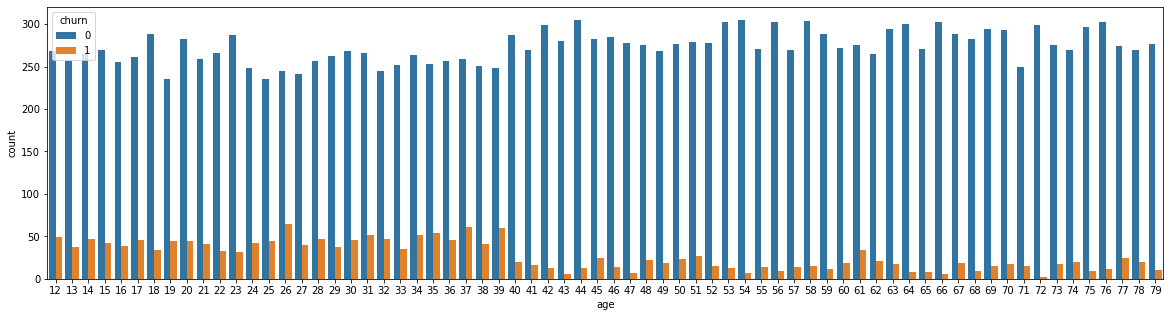

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(x='age', data=data, hue='churn');

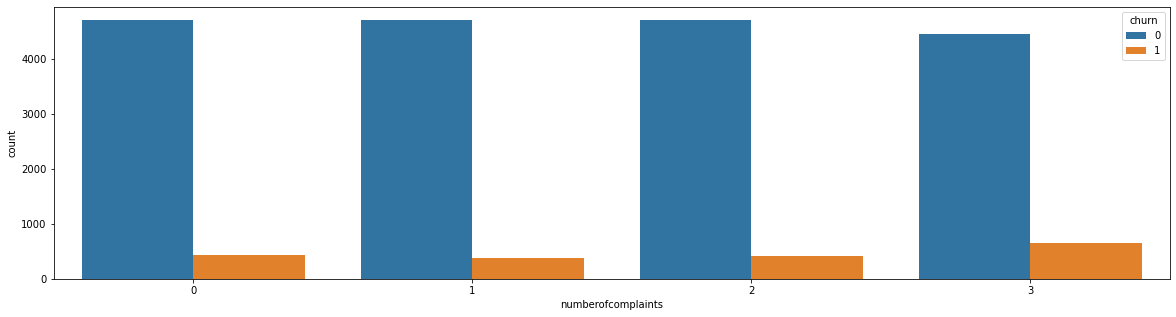

In [20]:
plt.figure(figsize=(20,5))
sns.countplot(x='numberofcomplaints', data=data, hue='churn');

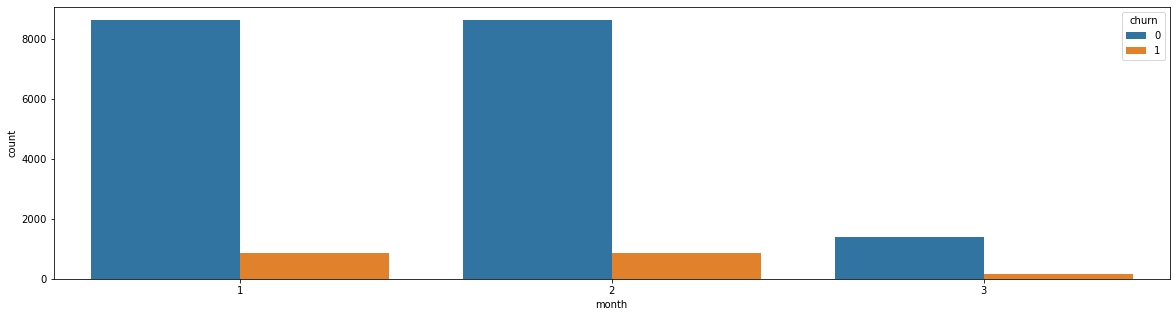

In [21]:
plt.figure(figsize=(20,5))
sns.countplot(x='month', data=data, hue='churn');

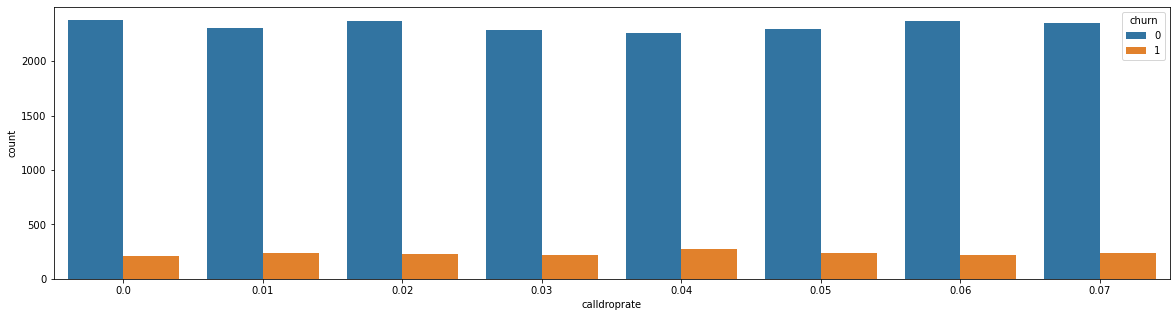

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x='calldroprate', data=data, hue='churn');

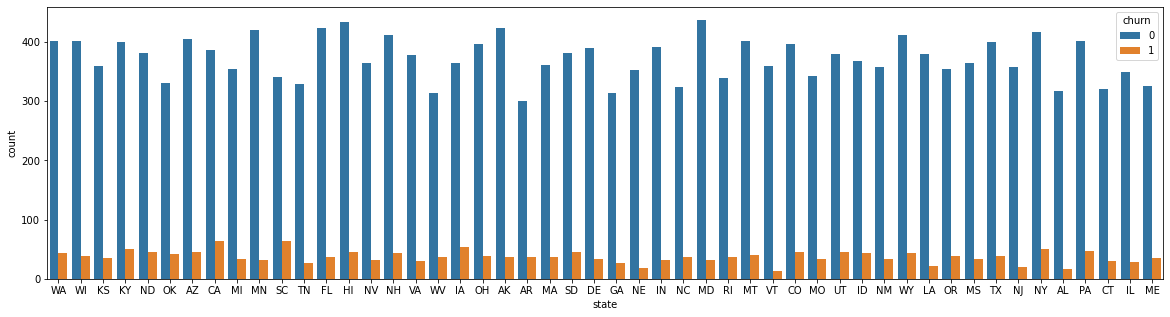

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(x='state', data=data, hue='churn');

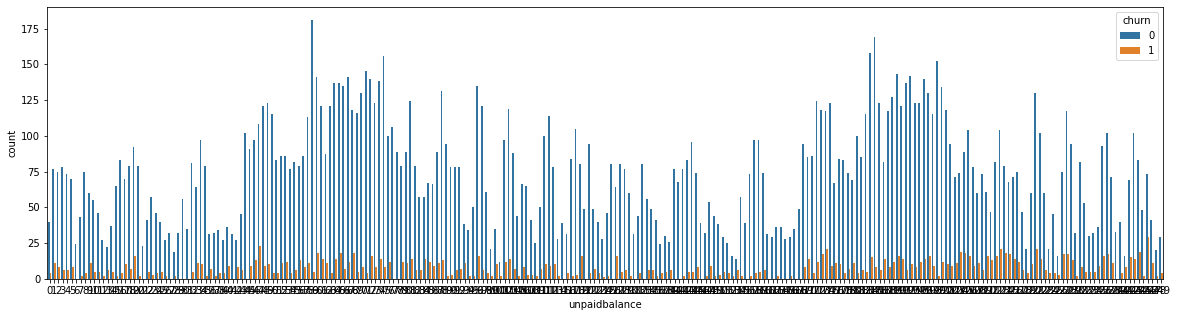

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(x='unpaidbalance', data=data, hue='churn');

### Добавление признаков

In [25]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

for col in object_cols:
    print(f'Уникальные записи в столбце {col}:')
    print(len(data[col].value_counts()))

Уникальные записи в столбце customersuspended:
2
Уникальные записи в столбце education:
4
Уникальные записи в столбце gender:
2
Уникальные записи в столбце homeowner:
2
Уникальные записи в столбце maritalstatus:
2
Уникальные записи в столбце occupation:
3
Уникальные записи в столбце state:
50
Уникальные записи в столбце usesinternetservice:
2
Уникальные записи в столбце usesvoiceservice:
2


In [26]:
bin_cols =[]
mul_cols = []
for col in object_cols:
    if len(data[col].value_counts())==2:      
        bin_cols.append(col)
    else:        
        mul_cols.append(col)
        
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data[bin_cols] = ordinal_encoder.fit_transform(data[bin_cols])

data2 = pd.get_dummies(data[mul_cols])
data3 = data.drop(mul_cols, axis=1)

data = pd.concat([data3, data2], axis=1)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 80 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    20468 non-null  int64  
 1   annualincome                           20468 non-null  int64  
 2   calldroprate                           20468 non-null  float64
 3   callfailurerate                        20468 non-null  float64
 4   customerid                             20468 non-null  int64  
 5   customersuspended                      20468 non-null  float64
 6   gender                                 20468 non-null  float64
 7   homeowner                              20468 non-null  float64
 8   maritalstatus                          20468 non-null  float64
 9   monthlybilledamount                    20468 non-null  int64  
 10  numberofcomplaints                     20468 non-null  int64  
 11  nu

### Проверяем признаки с помощью матрицы корреляций

In [28]:
c=data.corr()[['churn']]
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

churn  age                              -0.137655
       state_VT                         -0.026604
       education_Master or equivalent   -0.026570
       state_NE                         -0.020077
       state_LA                         -0.018907
                                           ...   
       state_CA                          0.025664
       state_SC                          0.033248
       unpaidbalance                     0.047482
       numberofcomplaints                0.054646
       churn                             1.000000
Length: 80, dtype: float64


churn  state_MT              0.000270
       state_MO              0.000397
       state_OH              0.000699
       state_MA              0.000952
       state_KS              0.001177
                               ...   
       state_SC              0.033248
       unpaidbalance         0.047482
       numberofcomplaints    0.054646
       age                   0.137655
       churn                 1.000000
Length: 80, dtype: float64


<Figure size 720x360 with 0 Axes>

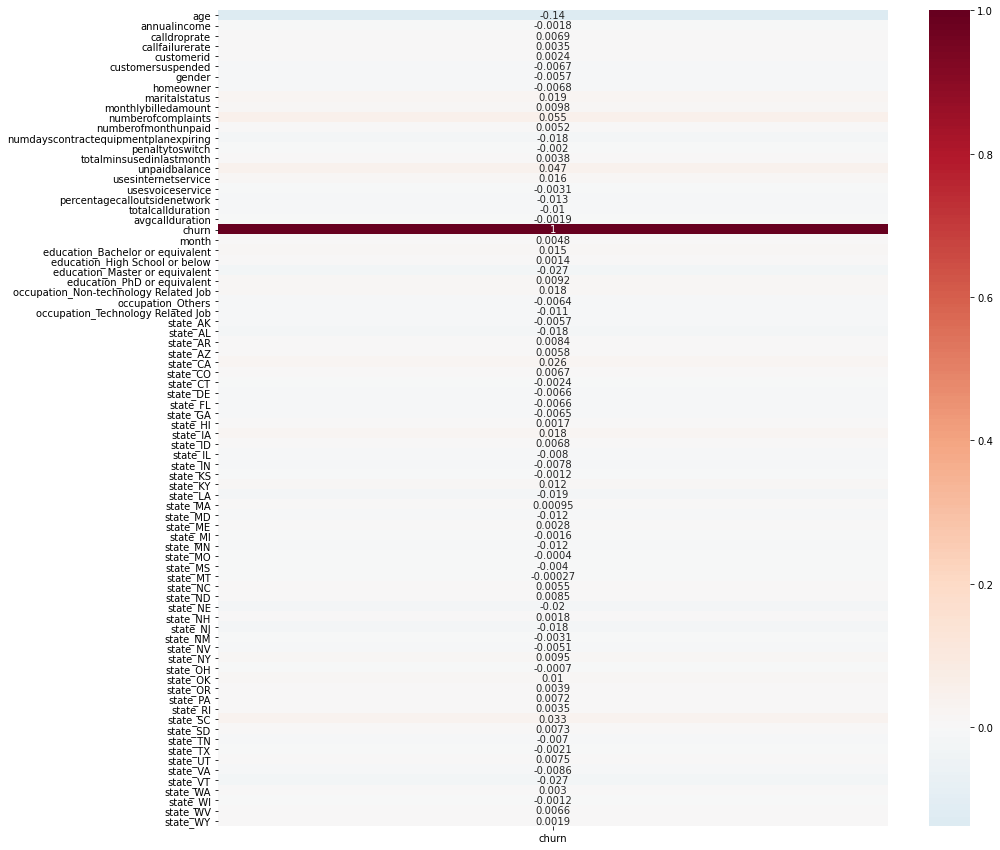

In [29]:
plt.figure(figsize=(10,5))
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data.corr()[['churn']],cmap="RdBu_r",center=0.0, annot=True);
c=data.corr()[['churn']].abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

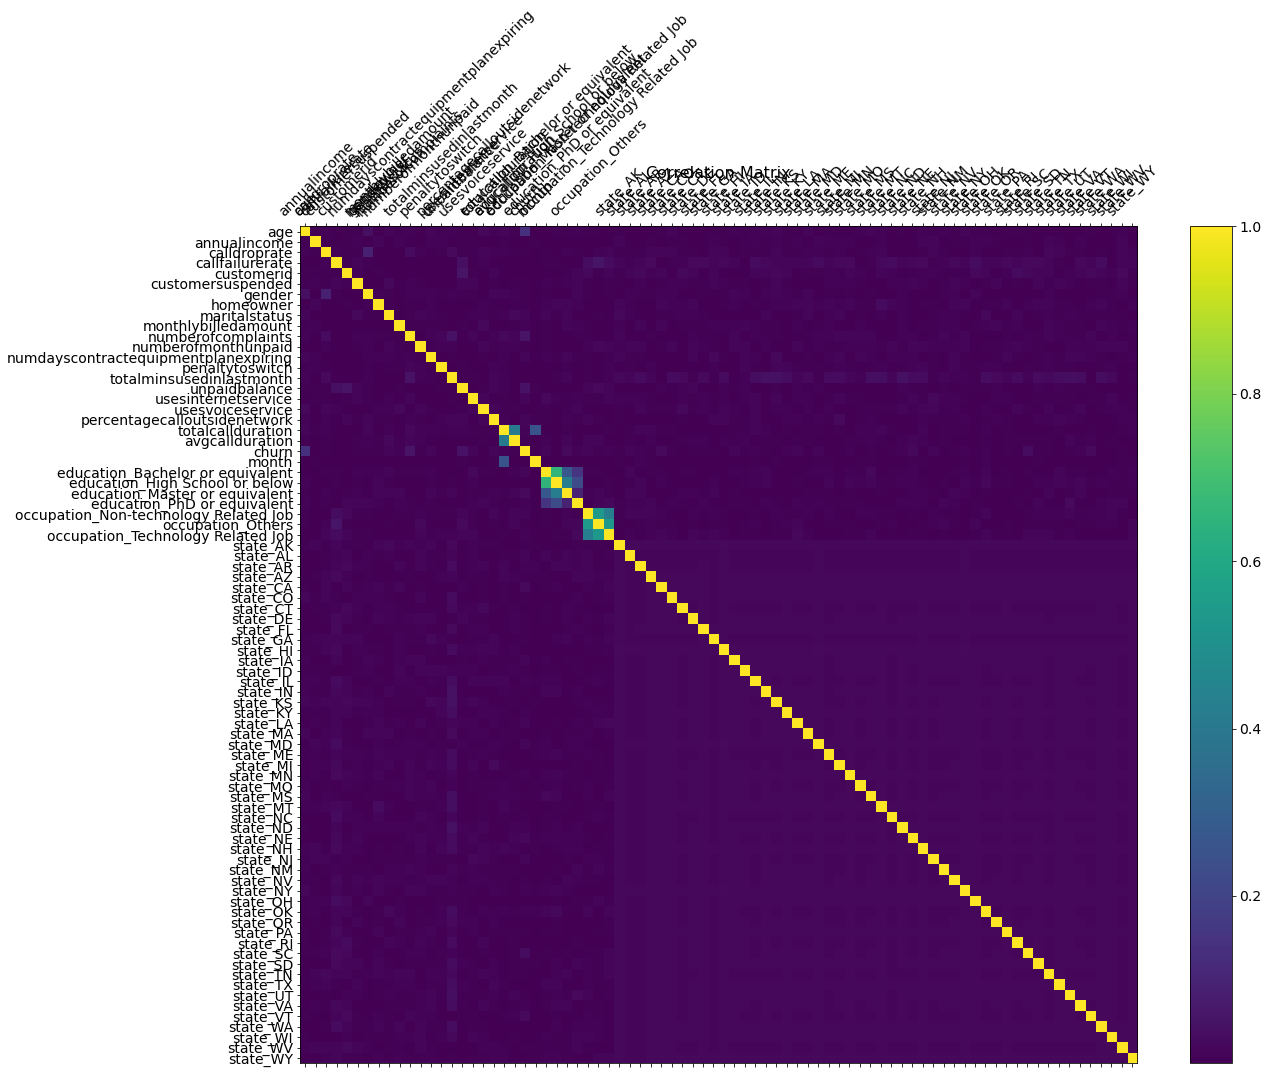

In [30]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data.corr(method='spearman').abs(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=45)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [31]:
num_cols_1 = ['unpaidbalance']
for i in num_cols_1:
    data[i + 'ˆ2'] = data[i]**2
    data[i + 'ˆ4'] = data[i]**4
    data[i + 'ˆ6'] = data[i]**6       

In [32]:
num_cols_2 = ['numberofcomplaints']
for i in num_cols_2:
    data[i + '*2'] = data[i]*2
    data[i + '*4'] = data[i]*4
    data[i + '*6'] = data[i]*6

In [33]:
data['age_in'] = data.age.apply(lambda x: 0 if x < 40 else 1)
data['age_in'].value_counts()

1    11963
0     8505
Name: age_in, dtype: int64

### Удаляем малозначительные и признаки на основе которых были созданы новые

In [34]:
to_drop=['unpaidbalance','numberofcomplaints']
data=data.drop(to_drop,axis=1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Data columns (total 85 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   age                                    20468 non-null  int64  
 1   annualincome                           20468 non-null  int64  
 2   calldroprate                           20468 non-null  float64
 3   callfailurerate                        20468 non-null  float64
 4   customerid                             20468 non-null  int64  
 5   customersuspended                      20468 non-null  float64
 6   gender                                 20468 non-null  float64
 7   homeowner                              20468 non-null  float64
 8   maritalstatus                          20468 non-null  float64
 9   monthlybilledamount                    20468 non-null  int64  
 10  numberofmonthunpaid                    20468 non-null  int64  
 11  nu

## Подготовка данных к машинному обучению

### В признаках каждый месяц рассматриваются идентичные клиенты. Рассмотрим процентное соотношение кол-ва месяцев и поробуем отсортировать данные по месяцам.

In [36]:
data['month'].value_counts(normalize=True)

1    0.462918
2    0.462478
3    0.074604
Name: month, dtype: float64

In [37]:
data = data.sort_values(by='month')

## Разбиение данных

In [38]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

train, validate, test = train_validate_test_split(data)

In [39]:
def X_y_split(df):
    X_df=df.copy()
    Y_df=df['churn']
    to_drop=['churn']
    X_df=X_df.drop(to_drop,axis=1)
    return X_df, Y_df

X_train, y_train = X_y_split(train)
X_validate, y_validate = X_y_split(validate)
X_test, y_test = X_y_split(test)

### Стандартизация (StandardScaler)

In [40]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_validate_scaler = scaler.transform(X_validate)

In [41]:
def show_roc_curve(y_true, y_pred_prob):
    """Функция отображает ROC-кривую"""
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.figure()
    plt.plot([0, 1], label='Случайный классификатор', linestyle='--')
    plt.plot(fpr, tpr, label='Логистическая регрессия')
    plt.title('Логистическая регрессия ROC AUC = %0.6f' %
              roc_auc_score(y_true, y_pred_prob))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

## Первая модель

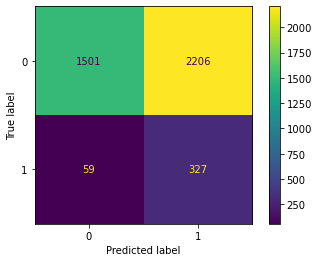

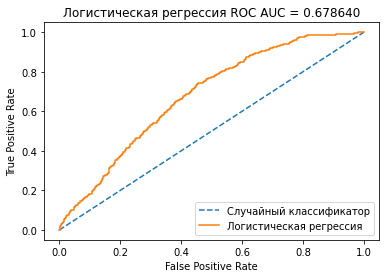

In [42]:
parameters = {'C': list(np.linspace(0, 1, num=10))}
model = LogisticRegression(class_weight="balanced",
                           max_iter=800,
                           solver='sag',
                           random_state=RANDOM_SEED)
grid_search_cv_fr = GridSearchCV(model, parameters, n_jobs=-1)
grid_search_cv_fr.fit(X_train_scaler, y_train)

bestgrid_search_cv_fr = grid_search_cv_fr.best_params_
best_rf = grid_search_cv_fr.best_estimator_
best_rf.fit(X_train_scaler, y_train)

probs = best_rf.predict_proba(X_validate_scaler)

y_pred_prob = probs[:, 1]
y_pred = best_rf.predict(X_validate)

plot_confusion_matrix(best_rf, X_validate_scaler, y_validate)

# Оценка качества модели
show_roc_curve(y_validate, y_pred_prob)

## Вторая модель

In [43]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
parameters = {
    'n_estimators': range(1, 51, 10),
    'max_depth': range(1, 13, 2),
    'min_samples_leaf': range(1, 8),
    'min_samples_split': range(2, 10, 2),
}
grid_search_cv_fr = GridSearchCV(rf, parameters, cv=3, n_jobs=-1)
grid_search_cv_fr.fit(X_train_scaler, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(1, 51, 10)})

In [44]:
bestgrid_search_cv_fr = grid_search_cv_fr.best_params_
best_rff = grid_search_cv_fr.best_estimator_
best_rff.fit(X_train_scaler, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=11,
                       n_jobs=-1, random_state=0)

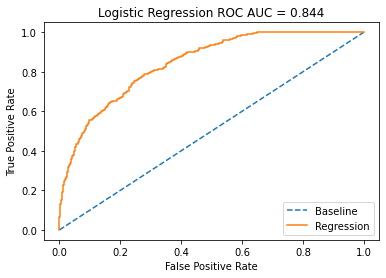

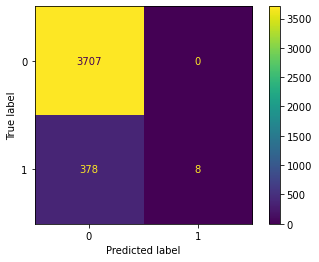

In [45]:
rand = RandomForestClassifier(max_depth=11,
                              min_samples_split=4,
                              n_estimators=11,
                              n_jobs=-1,
                              random_state=0)
rand.fit(X_train_scaler, y_train)
probs = rand.predict_proba(X_validate_scaler)
probs = probs[:, 1]

fpr, tpr, threshold = roc_curve(y_validate, probs)
roc_auc = roc_auc_score(y_validate, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label='Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()
rand.feature_importances_
plot_confusion_matrix(rand, X_validate_scaler, y_validate)

## Третья модель

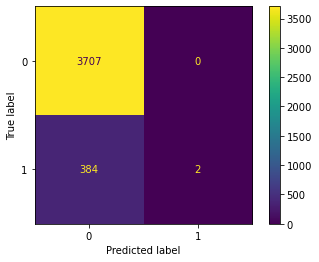

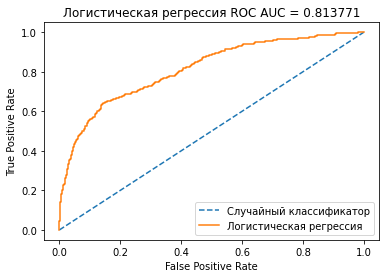

In [47]:
model =svm.SVC(kernel='poly', probability=True)
model.fit(X_train_scaler, y_train)


probs = model.predict_proba(X_validate_scaler)

y_pred_prob = probs[:, 1]
y_pred = model.predict(X_validate)

plot_confusion_matrix(model, X_validate_scaler, y_validate)

# Оценка качества модели
show_roc_curve(y_validate, y_pred_prob)

## Submission

In [48]:
best_rff.fit(X_train_scaler, y_train)

RandomForestClassifier(max_depth=11, min_samples_leaf=2, n_estimators=11,
                       n_jobs=-1, random_state=0)

In [50]:
X_test_scaler = scaler.transform(X_test)

In [51]:
y_pred_prob = best_rff.predict_proba(X_test_scaler)[:, 1]
# y_pred_prob = model.predict_proba(X_test)[:,1]

submit = pd.DataFrame(test.customerid)
submit['churm'] = y_pred_prob
submit.to_csv('submission.csv', index=False)
submit.head(10)

,customerid,churm
5616,2603,0.203577
5238,2429,0.215320
19210,8938,0.009226
11243,5231,0.055907
18730,8716,0.087780
18888,8790,0.007861
12357,5748,0.275490
6660,3088,0.105612
2614,1214,0.187574
15528,7223,0.028857


# Выводы:


### Сбалансировать выборку данными действиями:
1.	Подбор порога бинаризации предсказания (недостаток: алгоритм всё равно не уделяет достаточно внимания объектам малого класса во время обучения) <br>
2.	Undersampling – выкинем часть выборки <br>
3.	Oversampling – продублируем объекты малого класса <br>
4.	Undersampling using prototype selection – выбор эталонных данных (опорных) объектов из частого класса, остальные объекты фильтруются. <br>

Undersampling /Oversampling в некотором смысле равносильны взвешиванию объектов, так как некоторые объекты войдут в loss функцию меньше/больше раз.
	Дополнительно:
1.	При оверсемплинге можно вносить небольшой шум в данные.
2.	StratifiedKFold вместо KFold при несбаланированной выборке.
3.	Замерять итоговое качество на первичных данных.
4.	ROC-AUC vs Log loss при over/under-samling.

### Улучшить призники и ознакомится с деятельностью заказчика.